# West Nile Virus Data Story
https://www.kaggle.com/c/predict-west-nile-virus
#### Instructions:
Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.

Get going by asking the following questions and looking for the answers with some code and plots:
Can you count something interesting?
Can you find some trends (high, low, increase, decrease, anomalies)?
Can you make a bar plot or a histogram?
Can you compare two related quantities?
Can you make a scatterplot?
Can you make a time-series plot?

Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?


#### Main conclusions:
* August is the month with the most occurrences of West Nile Virus(WNV), but it also has the most samples in the dataset.
* No obvious correlation between number of mosquitos trapped and detection of WNV
* No obvious correlation bewteen locations and detection of WNV

#### TO BE CONTINUED





In [131]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from scipy import stats
% matplotlib inline

In [132]:
# load data
train = pd.read_csv('train.csv')
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [133]:
spray = pd.read_csv('spray.csv')
spray.head(2)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163


In [134]:
weather = pd.read_csv('weather.csv')
weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,5/1/2007,83,50,67,14,51,56,0,2,...,,0,M,0,0,29.1,29.82,1.7,27,9.2
1,2,5/1/2007,84,52,68,M,51,57,0,3,...,,M,M,M,0,29.18,29.82,2.7,25,9.6


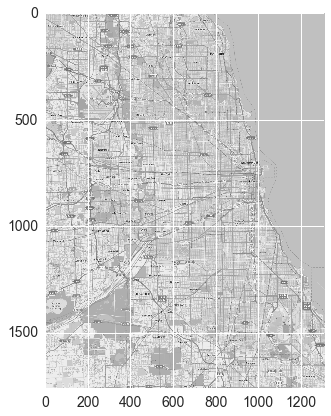

In [135]:
# show map data
mapdata = np.loadtxt('mapdata_copyright_openstreetmap_contributors.txt')
plt.figure(figsize=(5,25))
plt.imshow(mapdata, cmap = plt.get_cmap('gray'))
plt.show()

### Explore relationship between number of mosquitos and time

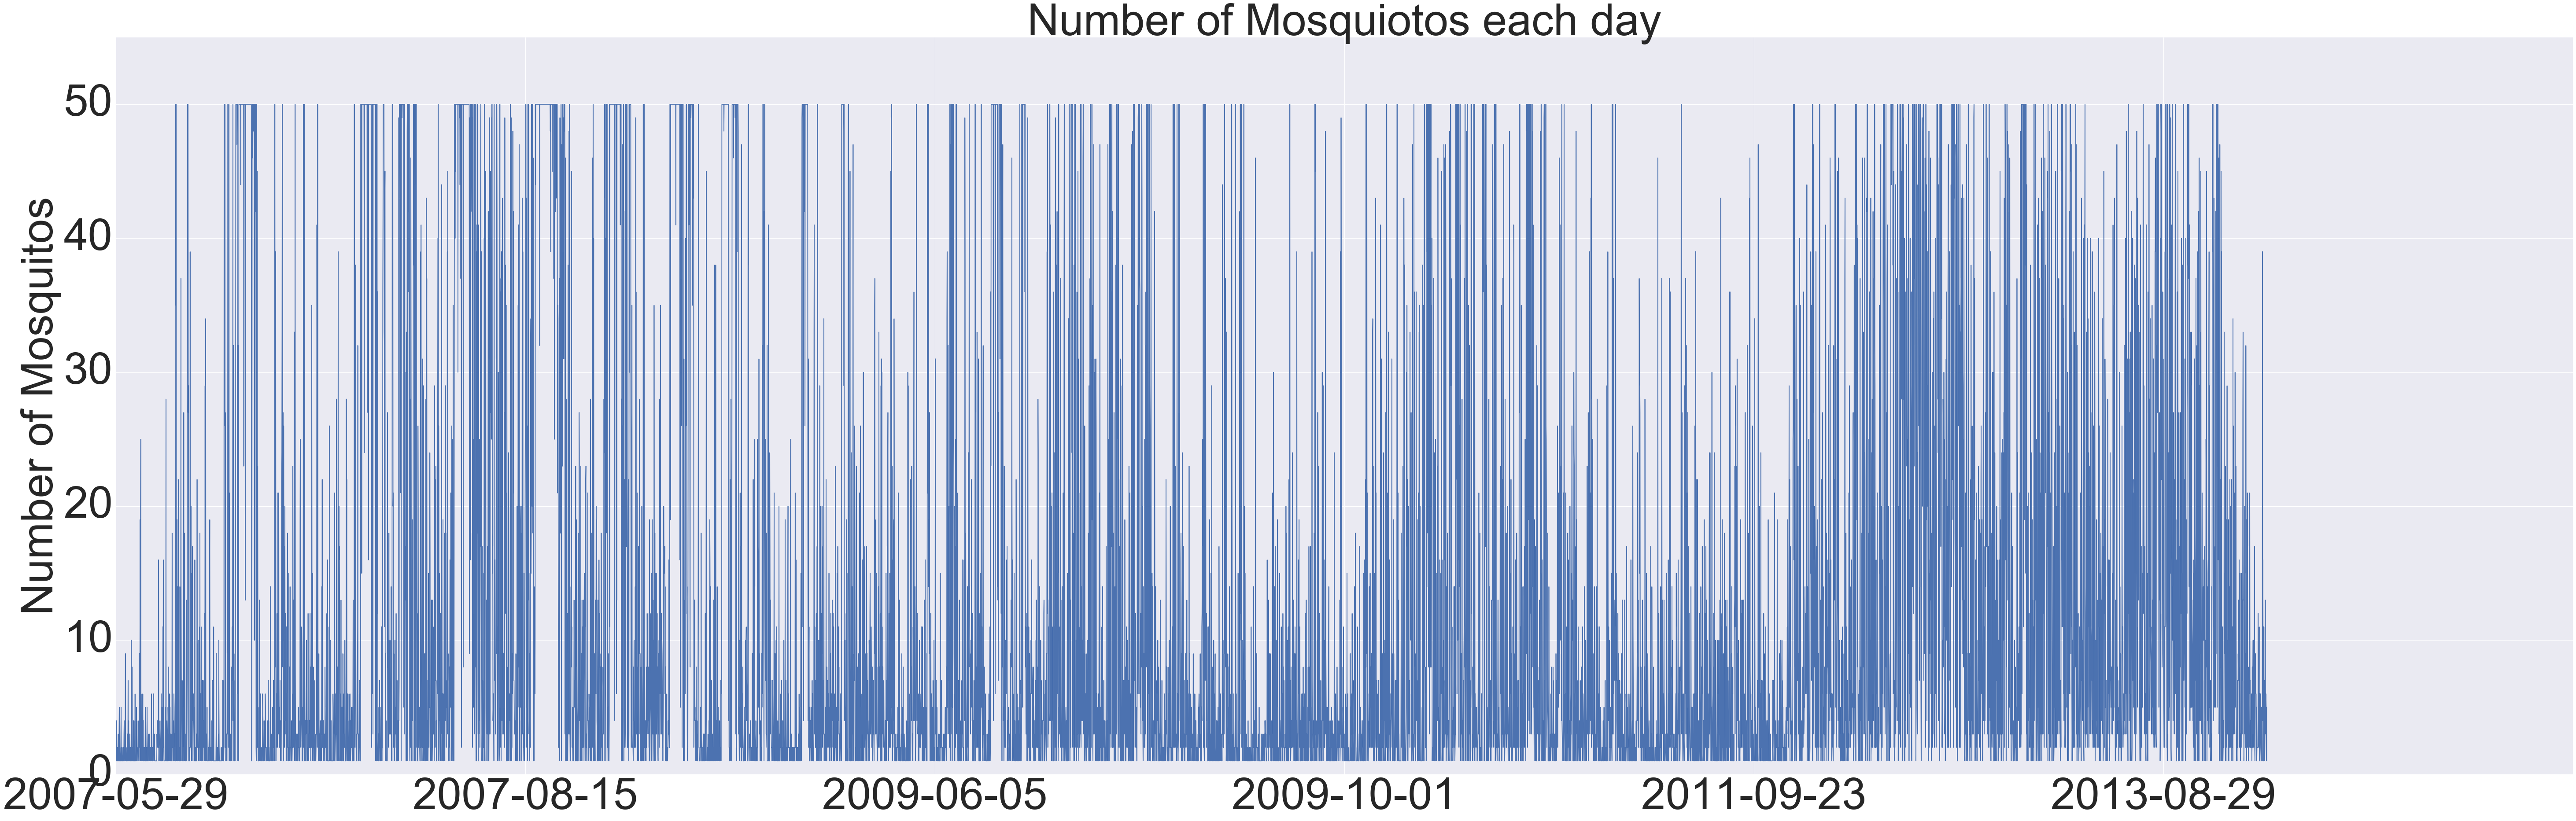

In [136]:
# plot number of mosquitos 
NumMos = train.NumMosquitos
plt.figure(figsize=(100,30))
plt.ylim(0,55)
plt.plot(NumMos)
plt.ylabel('Number of Mosquitos',fontsize = 100)
plt.yticks(fontsize = 100)
plt.xticks(range(0,len(train),2000), train.Date[range(0,len(train),2000)] )
plt.xticks(fontsize = 100)
plt.title('Number of Mosquiotos each day',fontsize=100)
plt.show()

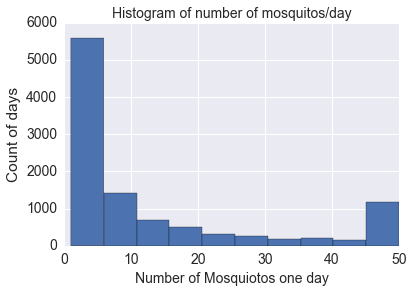

In [137]:
# bar plot of number of mosquitos
plt.hist(NumMos)
plt.xlabel('Number of Mosquiotos one day',fontsize= 14)
plt.ylabel('Count of days')
plt.title('Histogram of number of mosquitos/day',fontsize =14)
plt.show()


### Explore relationship between detection of WN Virus and time

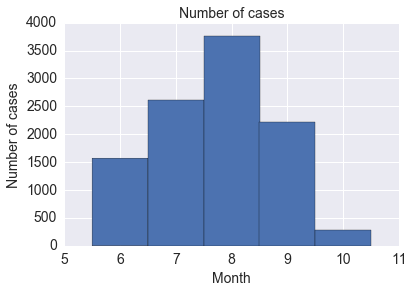

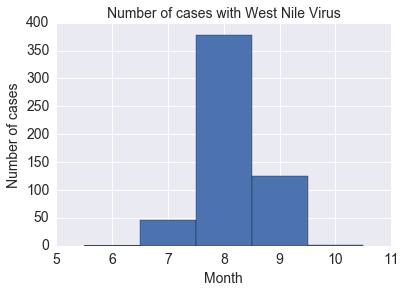

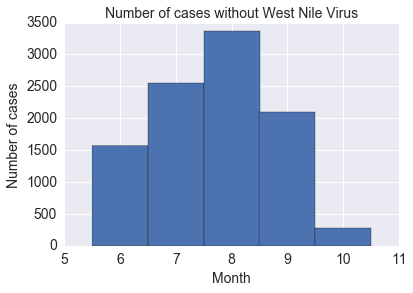

In [138]:
# histogram of months with wnvpresent = 1
# histogram of months with wnvpresent = 0
from datetime import datetime
import calendar

Dates = train.Date
months = [int(x[5:7]) for x in Dates]
Dates_yes = train.Date[train.WnvPresent==1]
months_yes = [int(x[5:7]) for x in Dates_yes]
Dates_no = train.Date[train.WnvPresent==0]
months_no = [int(x[5:7]) for x in Dates_no]
binsbound = np.linspace(6,11,6)

plt.hist(months,bins=binsbound-0.5)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of cases',fontsize=14)
plt.title('Number of cases',fontsize=14)
#plt.xlim(5.5,10,5)
plt.show()

plt.hist(months_yes,bins=binsbound-0.5)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of cases',fontsize=14)
plt.title('Number of cases with West Nile Virus',fontsize=14)
#plt.xlim(5.5,10,5)
plt.show()

plt.hist(months_no,bins=binsbound-0.5)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of cases',fontsize=14)
plt.title('Number of cases without West Nile Virus',fontsize=14)
#plt.xlim(5.5,10,5)
plt.show()



### Explore relationship between detection of WN Virus and number of mosquitos/locations

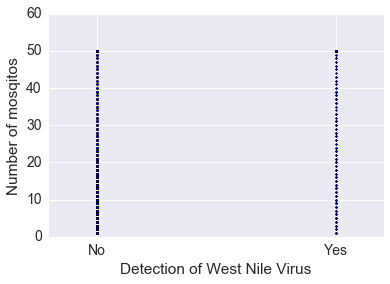

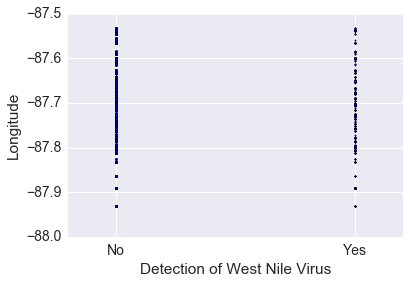

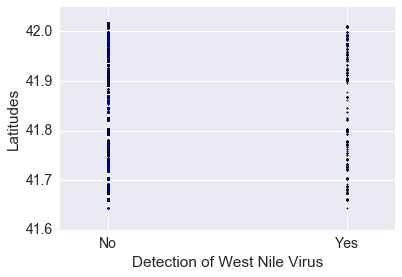

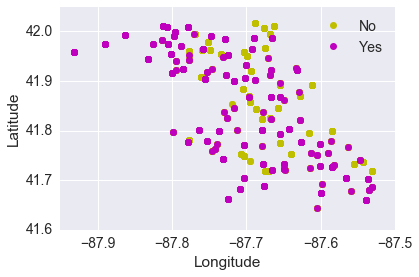

In [139]:
import plotly.plotly as py
import plotly.graph_objs as go
'''

# create a trace
#trace = go.Scatter(y = train.NumMosquitos, x = train.WnvPresent, mode = 'markers')
#data = [trace]

#py.iplot(data, filename = 'basic-scatter')

# plot relationship between number of mosquitos and detection of West Nile Virus
plt.scatter(train.WnvPresent, train.NumMosquitos,s = 2)
plt.xticks([0,1],['No','Yes'])
plt.ylim([0,60])
plt.xlabel('Detection of West Nile Virus')
plt.ylabel('Number of mosqitos')
plt.show()


plt.scatter(train.WnvPresent, train.Longitude,s = 2)
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Detection of West Nile Virus')
plt.ylabel('Longitude')
plt.show()

plt.scatter(train.WnvPresent, train.Latitude,s = 2)
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Detection of West Nile Virus')
plt.ylabel('Latitudes')
plt.show()


#fig, mapax = plt.subplots(1,1, figsize = (8,10), sharex = True, sharey = True)
plt.plot(train.Longitude, train.Latitude,'yo',label = 'No')
plt.plot(train.Longitude[train.WnvPresent==1], train.Latitude[train.WnvPresent == 1],'mo',label='Yes')
plt.legend( loc='upper right', numpoints = 1 )
plt.xlabel('Longitude')
plt.ylabel('Latitude')


plt.show()
'''

Explore relationship between detection of WN Virus and number of mosquitos/locations

### Explore relationship between type of mosquitos and detection of WN virus
* West virus was prensented in Mosquitos: CULEX PIPIENS and CULEX RESTUANS
* Two species of Culex mosquitoes are common throughout much of North America. Culex restuans Theobold is a native species, whereas Culex pipiens L. is a European immigrant that has been in North America since the 1600s.
http://ee.oxfordjournals.org/content/early/2015/06/26/ee.nvv094

In [140]:
# types of mosquitos
mos = train.Species
mostype = set(mos)
mostype

len(train[train['Species'] == 'CULEX TARSALIS'])
len(train[train['Species'] == 'CULEX ERRATICUS'])

1

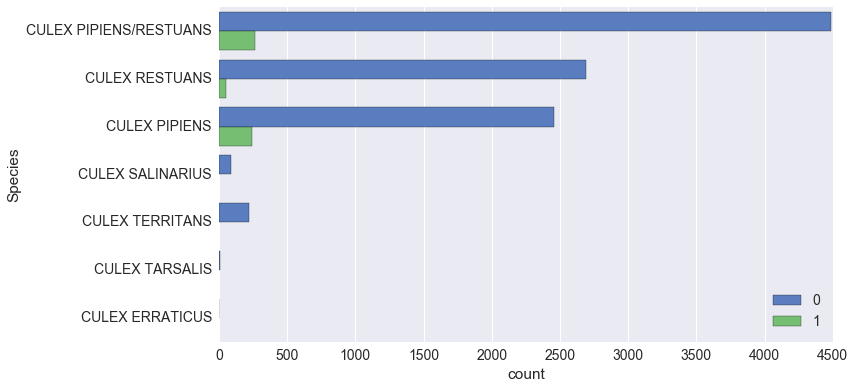

In [141]:
# add new columns for each element of categorical data of mosquitos species
sns.set(font_scale = 1.4)
fig,ax = plt.subplots(figsize = (11,6))
sns.countplot(y = 'Species', hue = 'WnvPresent',data = train, palette = 'muted')
plt.legend(loc = 'lower right')
plt.show()